In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

Binned_Data_binning_dpleo_20180121_run076kg5.dat*
MeanJD_20200102_run008g.dat
MeanJD_Kittipong_2021.dat*
MeanJD_Method.dat
MeanJD_Table123_20200102_run008g.dat*
MeanJD_Table123_Thiswork.dat*
MeanJD_Table123_filter.dat*
MeanJD_Table12_Beuermann_2014.dat*
MeanJD_Table1_Beuermann_2014.dat*
MeanJD_Table2_Beuermann_2014.dat*
MeanJD_filter.dat
interporate_ln_fit.out
interporate_sin_TNO_fit.out
interporate_sin_fit.out
spot_longitude_Beuermann_2014.ipynb*
spot_longitude_Beuermann_2014_20200102_run008g.ipynb
spot_longitude_Beuermann_2014_20200102_run008g.pdf
spot_longitude_Beuermann_2014_Method.ipynb
spot_longitude_Beuermann_2014_Method.pdf
spot_longitude_Beuermann_2014_filter.ipynb
spot_longitude_Beuermann_2014_filter.pdf
spot_longitude_Beuermann_2014_rev1.pdf
spot_longitude_Beuermann_Kittipong.pdf
spot_longitude_Beuermann_Kittipong.png
spot_longitude_Data_binning_dpleo_20180121_run076kg5.ipynb*


In [3]:
#Read data ---#1
Input_1 = "MeanJD_Table1_Beuermann_2014.dat"
Data_1   = np.genfromtxt(Input_1)

#Read data ---#2
Input_2 = "MeanJD_Table2_Beuermann_2014.dat"
Data_2   = np.genfromtxt(Input_2)

#Read data ---#3
Input_3 = "MeanJD_20200102_run008g.dat"
Data_3   = np.genfromtxt(Input_3)

#Input calculation ---#1
N = 2400000

MeanJD_1 = Data_1[:,0] - N
Psi_1 = Data_1[:,1]
Psi_err_1 = Data_1[:,2]

#Input calculation ---#1
MeanJD_2 = Data_2[:,0] - N
Psi_2 = Data_2[:,1]
Psi_err_2 = Data_2[:,2]

#Input calculation ---#3
MeanJD_3 = Data_3[0] - N
Psi_3 = Data_3[1]
Psi_err_3 = Data_3[2]

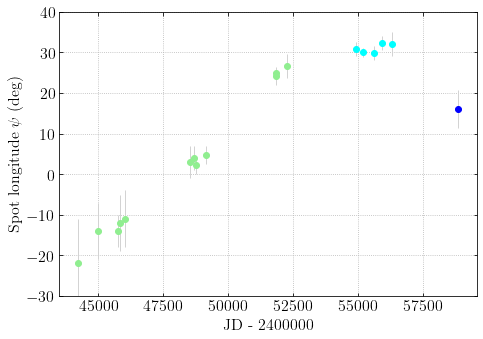

In [4]:
fig, (ax0) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(7, 5), tight_layout=True)
#plt.xlim(-0.04,0.04)
#plt.xlabel('Orbital phase')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(MeanJD_1, Psi_1, yerr=Psi_err_1, fmt='o', color='cyan',
             ecolor='lightgray', elinewidth=1, capsize=0)
ax0.errorbar(MeanJD_2, Psi_2, yerr=Psi_err_2, fmt='o', color='lightgreen',
             ecolor='lightgray', elinewidth=1, capsize=0)
ax0.errorbar(MeanJD_3, Psi_3, yerr=Psi_err_3, fmt='o', color='blue',
             ecolor='lightgray', elinewidth=1, capsize=0)


#ax0.legend(loc="best")
ax0.set_xlabel('JD - '+str(N))
ax0.set_ylabel('Spot longitude $\psi$ (deg)')

ax0.set_ylim(-30, 40)

fig.align_ylabels()
plt.grid(linestyle='dotted')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("spot_longitude_Beuermann_2014_20200102_run008g.pdf", dpi=1200)
plt.show()

In [5]:
### Linear fit
x_ln = MeanJD_2
y_ln = Psi_2
dy_ln = Psi_err_2

len_x_ln = len(x_ln)
print(len_x_ln)

12


In [6]:
# Calling the scipy's curve_fit function from optimize module
from scipy.optimize import curve_fit
import scipy.optimize as optimization 

# Defining a fitting fucntion
def linear_fit(x,m,c):
    return m*x + c

#params, covariance = optimization.curve_fit(f = linear_fit, xdata = x, ydata = y, sigma=dy, absolute_sigma=False)
params, covariance = optimization.curve_fit(linear_fit, x_ln, y_ln)

m = params[0]
c = params[1]

dm = covariance[0,0]
dc = covariance[1,1]


print('Slope (m) is ', m)
print('The error of the slope (dm) is ', dm**0.5)
print('Intercept (c) is ', c)
print('The error of the intercept (dc) is ', dc**0.5)

Slope (m) is  0.005908639833623479
The error of the slope (dm) is  0.00019033303549671117
Intercept (c) is  -283.2520863641199
The error of the intercept (dc) is  9.183244287178326


In [7]:
x_min, x_max = np.amin(x_ln), np.amax(x_ln)
x_line_ln = np.linspace(x_min, x_max)
print(len(x_line_ln))
y_line_ln = linear_fit(x_line_ln, *params) #### For all interporation 
ys = linear_fit(x_ln, *params)

print(len(y_line_ln))
print(len(ys))

Residual_ln = y_ln - ys

#np.savetxt('TNO_ephemeris_determination_1.out', np.c_[x_line, y_line, y, dy], fmt="%.5f")

#Reduced_chisqrt
m = 2
dof = len_x_ln - m
Chi_sqr = ((y_ln - ys)**2/(dy_ln)**2)/dof
Reduced_chisq_ln= sum(Chi_sqr)
print(Reduced_chisq_ln)

50
50
12
0.6490458320826108


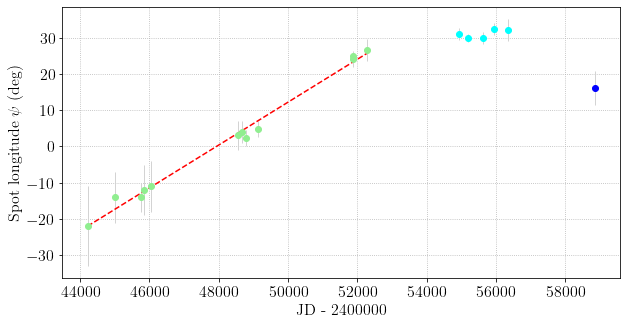

In [8]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(MeanJD_1, Psi_1, yerr=Psi_err_1, fmt='o', color='cyan',ecolor='lightgray', elinewidth=1, capsize=0)
plt.errorbar(MeanJD_2, Psi_2, yerr=Psi_err_2, fmt='o', color='lightgreen', ecolor='lightgray', elinewidth=1, capsize=0)
plt.errorbar(MeanJD_3, Psi_3, yerr=Psi_err_3, fmt='o', color='blue',ecolor='lightgray', elinewidth=1, capsize=0)
# create a line plot for the mapping function
plt.plot(x_line_ln, y_line_ln, '--', color='red')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
#ax0.legend(loc="best")
plt.xlabel('JD - '+str(N))
plt.ylabel('Spot longitude $\psi$ (deg)')
plt.grid(linestyle='dotted')
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()

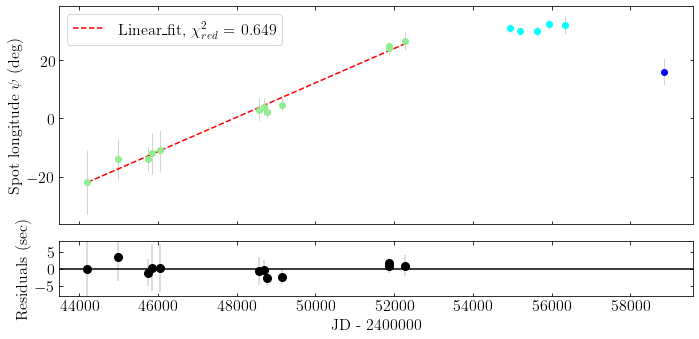

In [9]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
#plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(MeanJD_1, Psi_1, yerr=Psi_err_1, fmt='o', color='cyan',ecolor='lightgray', elinewidth=1, capsize=0)
ax0.errorbar(MeanJD_2, Psi_2, yerr=Psi_err_2, fmt='o', color='lightgreen', ecolor='lightgray', elinewidth=1, capsize=0)
ax0.errorbar(MeanJD_3, Psi_3, yerr=Psi_err_3, fmt='o', color='blue',ecolor='lightgray', elinewidth=1, capsize=0)
ax0.plot(x_line_ln, y_line_ln, '--', color='red',label='Linear\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_ln)))

ax0.legend(loc="best")
ax0.set_ylabel('Spot longitude $\psi$ (deg)')
ax1.set_xlabel('JD - '+str(N))
ax1.set_ylabel('Residuals (sec)')
ax1.set_ylim(-8,8)

ax1.errorbar(x_ln, Residual_ln, yerr= dy_ln, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
#plt.savefig("TNO_ephemeris_determination_linear.pdf", dpi=1000)

plt.show()

In [10]:
N_tot = 550
x_range = [i for i in range(N)]
y_range = [i for i in range(len(x_range))]
step=1*100
#step

interporate = []
for i in range(400, N_tot):
    x_range[i] = i*step
    y_range[i] = linear_fit(x_range[i], *params)
#    print(x_range[i], y_range[i])
    interporate.append('%0.0f %0.5f %0.5f' %(i, x_range[i], y_range[i]))
    
data_out = interporate
f = open("interporate_ln_fit.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

InputFile_out = "interporate_ln_fit.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_range_ln = Data_out[:,1]
y_range_ln = Data_out[:,2]

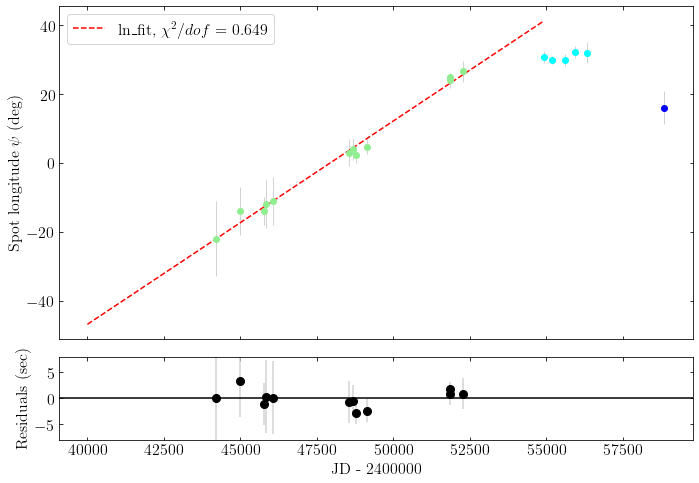

In [11]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 7), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(MeanJD_1, Psi_1, yerr=Psi_err_1, fmt='o', color='cyan',ecolor='lightgray', elinewidth=1, capsize=0)
ax0.errorbar(MeanJD_2, Psi_2, yerr=Psi_err_2, fmt='o', color='lightgreen', ecolor='lightgray', elinewidth=1, capsize=0)
ax0.errorbar(MeanJD_3, Psi_3, yerr=Psi_err_3, fmt='o', color='blue',ecolor='lightgray', elinewidth=1, capsize=0)
ax0.plot(x_range_ln, y_range_ln, '--', color='red',label='ln\_fit, $\chi^{2}/dof$ = '+str('%0.3f' %(Reduced_chisq_ln)))
ax0.legend(loc="best")
ax0.legend(loc="best")
ax0.set_ylabel('Spot longitude $\psi$ (deg)')
ax1.set_xlabel('JD - '+str(N))
ax1.set_ylabel('Residuals (sec)')
ax1.set_ylim(-8,8)


ax1.errorbar(x_ln, Residual_ln, yerr= dy_ln, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
#plt.savefig("2022_May_week4_TNO_TNO_ephemeris_lnLTT.pdf", dpi=1200)

plt.show()

In [12]:
### Sinusoidal fit
#Read data ---#2
Input_12 = "MeanJD_Table12_Beuermann_2014.dat"
Data_12   = np.genfromtxt(Input_12)

#Integer number
N = 2400000

#Input calculation ---#2
MeanJD_12 = Data_12[:,0] - N
Psi_12 = Data_12[:,1]
Psi_err_12 = Data_12[:,2]

In [13]:
x_sin = MeanJD_12
y_sin = Psi_12
dy_sin = Psi_err_12

len_x_sin = len(x_sin)
print(len_x_sin)

17


In [14]:
def sin_fit(x, a, b, c,d):
    return a*np.sin(b*x - np.radians(c)) + d

In [15]:
guess = [41.9455, 0.0000324289, -145.235,0]
params, params_covariance = optimization.curve_fit(sin_fit, x_sin, y_sin,sigma=dy_sin, absolute_sigma=False,p0=guess)

a = params[0]
b = params[1]
c = params[2]
d = params[3]

da = params_covariance[0,0]
db = params_covariance[1,1]
dc = params_covariance[2,2]
dd = params_covariance[3,3]

output_fit = sin_fit(x_sin, *params)


print("The fitting parameters")
print("a =", a, "+/-", da**0.5)
print("b =", b, "+/-", db**0.5)
print("c =", c, "+/-", dc**0.5)
print("d =", d, "+/-", dd**0.5)

oscillation_period_d = 2*np.pi/b
delta_oscillation_period_d = 2*np.pi*(db**0.5)/(b**2)
oscillation_period_yr = oscillation_period_d/365.25
delta_oscillation_period_yr = delta_oscillation_period_d/365.25
#an oscillation period of ∼60 yr, an amplitude of about 25 deg.
print("Amplitude (deg) =", a, "+/-", da**0.5)
print("Oscillation period (days):",oscillation_period_d, "+/-",delta_oscillation_period_d)
print("Oscillation period (yr):",oscillation_period_yr, "+/-",delta_oscillation_period_yr)

The fitting parameters
a = 24.88074818927855 +/- 2.1415066337396595
b = 0.0002898254645781505 +/- 2.675632390230131e-05
c = 457.19252817276157 +/- 81.51895034245513
d = 6.832000642419459 +/- 2.3242595717835406
Amplitude (deg) = 24.88074818927855 +/- 2.1415066337396595
Oscillation period (days): 21679.203779850566 +/- 2001.396941162382
Oscillation period (yr): 59.3544251330611 +/- 5.479526190725208


In [16]:
x_min, x_max = np.amin(x_sin), np.amax(x_sin)
x_line_sin = np.linspace(x_min, x_max)
y_line_sin = sin_fit(x_line_sin, *params) #### For all interporation 

In [17]:
#Reduced_chisqrt
n = 4
dof = len_x_sin - n
Residual_sin = y_sin - output_fit
Chi_sqr = ((y_sin - output_fit)**2/(dy_sin)**2)/dof
Reduced_chisq_sin = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq_sin)

Reduced_chisq: 0.5670205491247947


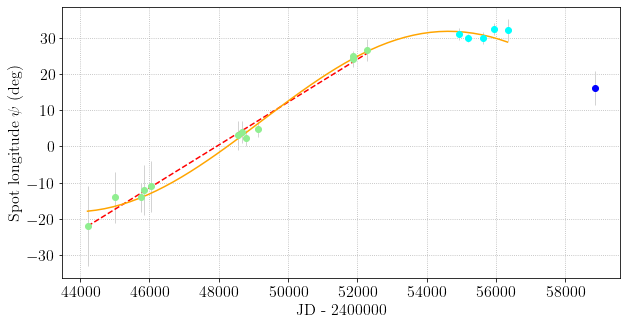

In [18]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(MeanJD_1, Psi_1, yerr=Psi_err_1, fmt='o', color='cyan',ecolor='lightgray', elinewidth=1, capsize=0)
plt.errorbar(MeanJD_2, Psi_2, yerr=Psi_err_2, fmt='o', color='lightgreen', ecolor='lightgray', elinewidth=1, capsize=0)
plt.errorbar(MeanJD_3, Psi_3, yerr=Psi_err_3, fmt='o', color='blue',ecolor='lightgray', elinewidth=1, capsize=0)
# create a line plot for the mapping function
plt.plot(x_line_ln, y_line_ln, '--', color='red')
plt.plot(x_line_sin, y_line_sin, '-', color='orange')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
#ax0.legend(loc="best")
plt.xlabel('JD - '+str(N))
plt.ylabel('Spot longitude $\psi$ (deg)')
plt.grid(linestyle='dotted')
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()

In [19]:
N_tot = 600
x_range = [i for i in range(N)]
y_range = [i for i in range(len(x_range))]
step=1*100
#step

interporate = []
for i in range(400, N_tot):
    x_range[i] = i*step
    y_range[i] = sin_fit(x_range[i], *params)
#    print(x_range[i], y_range[i])
    interporate.append('%0.0f %0.5f %0.5f' %(i, x_range[i], y_range[i]))
    
data_out = interporate
f = open("interporate_sin_fit.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

InputFile_out = "interporate_sin_fit.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_range_sin = Data_out[:,1]
y_range_sin = Data_out[:,2]

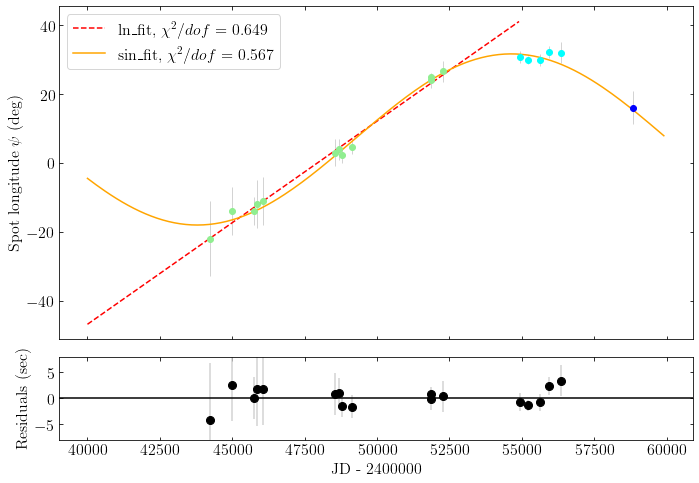

In [20]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 7), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(MeanJD_1, Psi_1, yerr=Psi_err_1, fmt='o', color='cyan',ecolor='lightgray', elinewidth=1, capsize=0)
ax0.errorbar(MeanJD_2, Psi_2, yerr=Psi_err_2, fmt='o', color='lightgreen', ecolor='lightgray', elinewidth=1, capsize=0)
ax0.errorbar(MeanJD_3, Psi_3, yerr=Psi_err_3, fmt='o', color='blue',ecolor='lightgray', elinewidth=1, capsize=0)
ax0.plot(x_range_ln, y_range_ln, '--', color='red',label='ln\_fit, $\chi^{2}/dof$ = '+str('%0.3f' %(Reduced_chisq_ln)))
ax0.plot(x_range_sin, y_range_sin, '-', color='orange',label='sin\_fit, $\chi^{2}/dof$ = '+str('%0.3f' %(Reduced_chisq_sin)))
ax0.legend(loc="best")
ax0.legend(loc="best")
ax0.set_ylabel('Spot longitude $\psi$ (deg)')
ax1.set_xlabel('JD - '+str(N))
ax1.set_ylabel('Residuals (sec)')
ax1.set_ylim(-8,8)


ax1.errorbar(x_sin, Residual_sin, yerr= dy_sin, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
#plt.savefig("2022_May_week4_TNO_TNO_ephemeris_lnLTT.pdf", dpi=1200)

plt.show()

In [21]:
ls

Binned_Data_binning_dpleo_20180121_run076kg5.dat*
MeanJD_20200102_run008g.dat
MeanJD_Kittipong_2021.dat*
MeanJD_Method.dat
MeanJD_Table123_20200102_run008g.dat*
MeanJD_Table123_Thiswork.dat*
MeanJD_Table123_filter.dat*
MeanJD_Table12_Beuermann_2014.dat*
MeanJD_Table1_Beuermann_2014.dat*
MeanJD_Table2_Beuermann_2014.dat*
MeanJD_filter.dat
interporate_ln_fit.out
interporate_sin_TNO_fit.out
interporate_sin_fit.out
spot_longitude_Beuermann_2014.ipynb*
spot_longitude_Beuermann_2014_20200102_run008g.ipynb
spot_longitude_Beuermann_2014_20200102_run008g.pdf
spot_longitude_Beuermann_2014_Method.ipynb
spot_longitude_Beuermann_2014_Method.pdf
spot_longitude_Beuermann_2014_filter.ipynb
spot_longitude_Beuermann_2014_filter.pdf
spot_longitude_Beuermann_2014_rev1.pdf
spot_longitude_Beuermann_Kittipong.pdf
spot_longitude_Beuermann_Kittipong.png
spot_longitude_Data_binning_dpleo_20180121_run076kg5.ipynb*


In [22]:
### Sinusoidal fit
#Read data ---#2
Input_123 = "MeanJD_Table123_20200102_run008g.dat"
Data_123   = np.genfromtxt(Input_123)

#Integer number
N = 2400000

#Input calculation ---#2
MeanJD_123 = Data_123[:,0] - N
Psi_123 = Data_123[:,1]
Psi_err_123 = Data_123[:,2]

In [23]:
x_sin_TNO = MeanJD_123
y_sin_TNO = Psi_123
dy_sin_TNO = Psi_err_123

len_x_sin_TNO = len(x_sin_TNO)
print(len_x_sin_TNO)

18


In [24]:
def sin_TNO_fit(x, a, b, c):
    return a*np.sin(b*x - np.radians(c))

In [25]:
guess = [41.9455, 0.0000324289, -145.23]
params, params_covariance = optimization.curve_fit(sin_TNO_fit, x_sin_TNO, y_sin_TNO,sigma=dy_sin_TNO, absolute_sigma=False,p0=guess)

a = params[0]
b = params[1]
c = params[2]

da = params_covariance[0,0]
db = params_covariance[1,1]
dc = params_covariance[2,2]


output_TNO_fit = sin_TNO_fit(x_sin_TNO, *params)


print("The fitting parameters")
print("a =", a, "+/-", da**0.5)
print("b =", b, "+/-", db**0.5)
print("c =", c, "+/-", dc**0.5)


oscillation_period_d = 2*np.pi/b
delta_oscillation_period_d = 2*np.pi*(db**0.5)/(b**2)
oscillation_period_yr = oscillation_period_d/365.25
delta_oscillation_period_yr = delta_oscillation_period_d/365.25
#an oscillation period of ∼60 yr, an amplitude of about 25 deg.
print("Amplitude (deg) =", a, "+/-", da**0.5)
#print("Oscillation period (days):",oscillation_period_d, "+/-",delta_oscillation_period_d)
print("Oscillation period (yr):",oscillation_period_yr, "+/-",delta_oscillation_period_yr)



The fitting parameters
a = 31.251014921110567 +/- 0.4945895163492465
b = -0.00023609682758998242 +/- 8.891148796310924e-06
c = -831.3945254832455 +/- 25.766573126117258
Amplitude (deg) = 31.251014921110567 +/- 0.4945895163492465
Oscillation period (yr): -72.86173225856756 +/- 2.7438932986974995


In [26]:
def sin_TNO_fit(x, a, b, c,d):
    return a*np.sin(b*x - np.radians(c)) + d

In [27]:
guess = [41.9455, 0.0000324289, -145.235,0]
params, params_covariance = optimization.curve_fit(sin_TNO_fit, x_sin_TNO, y_sin_TNO,sigma=dy_sin_TNO, absolute_sigma=False,p0=guess)

a = params[0]
b = params[1]
c = params[2]
d = params[3]

da = params_covariance[0,0]
db = params_covariance[1,1]
dc = params_covariance[2,2]
dd = params_covariance[3,3]

output_TNO_fit = sin_TNO_fit(x_sin_TNO, *params)


print("The fitting parameters")
print("a =", a, "+/-", da**0.5)
print("b =", b, "+/-", db**0.5)
print("c =", c, "+/-", dc**0.5)
print("d =", d, "+/-", dd**0.5)

oscillation_period_d = 2*np.pi/b
delta_oscillation_period_d = 2*np.pi*(db**0.5)/(b**2)
oscillation_period_yr = oscillation_period_d/365.25
delta_oscillation_period_yr = delta_oscillation_period_d/365.25
#an oscillation period of ∼60 yr, an amplitude of about 25 deg.
print("Amplitude (deg) =", a, "+/-", da**0.5)
#print("Oscillation period (days):",oscillation_period_d, "+/-",delta_oscillation_period_d)
print("Oscillation period (yr):",oscillation_period_yr, "+/-",delta_oscillation_period_yr)
print("Equilibrium longitude (deg) =", d, "+/-", dd**0.5)


The fitting parameters
a = 24.993146418943134 +/- 2.0439179209107534
b = 0.000287418845789139 +/- 2.2899524585955864e-05
c = 449.99986435724975 +/- 70.1796186187534
d = 6.701450090728812 +/- 2.1997837547715204
Amplitude (deg) = 24.993146418943134 +/- 2.0439179209107534
Oscillation period (yr): 59.85141228901467 +/- 4.768542172150994
Equilibrium longitude (deg) = 6.701450090728812 +/- 2.1997837547715204


In [28]:
x_min, x_max = np.amin(x_sin_TNO), np.amax(x_sin_TNO)
x_line_sin_TNO = np.linspace(x_min, x_max)
y_line_sin_TNO = sin_fit(x_line_sin_TNO, *params) #### For all interporation 

In [29]:
#Reduced_chisqrt
n = 4
dof = len_x_sin_TNO - n
Residual_sin_TNO = y_sin_TNO - output_TNO_fit
Chi_sqr = ((y_sin_TNO - output_TNO_fit)**2/(dy_sin_TNO)**2)/dof
Reduced_chisq_sin_TNO = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq_sin_TNO)

Reduced_chisq: 0.5278291900224074


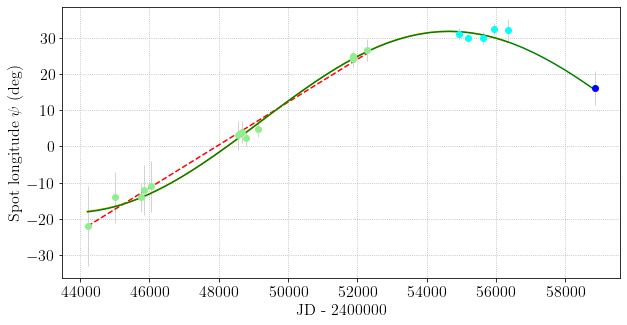

In [30]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(MeanJD_1, Psi_1, yerr=Psi_err_1, fmt='o', color='cyan',ecolor='lightgray', elinewidth=1, capsize=0)
plt.errorbar(MeanJD_2, Psi_2, yerr=Psi_err_2, fmt='o', color='lightgreen', ecolor='lightgray', elinewidth=1, capsize=0)
plt.errorbar(MeanJD_3, Psi_3, yerr=Psi_err_3, fmt='o', color='blue',ecolor='lightgray', elinewidth=1, capsize=0)
# create a line plot for the mapping function
plt.plot(x_line_ln, y_line_ln, '--', color='red')
plt.plot(x_line_sin, y_line_sin, '-', color='orange')
plt.plot(x_line_sin_TNO, y_line_sin_TNO, '-', color='green')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
#ax0.legend(loc="best")
plt.xlabel('JD - '+str(N))
plt.ylabel('Spot longitude $\psi$ (deg)')
plt.grid(linestyle='dotted')
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()

In [31]:
N_tot = 600
x_range = [i for i in range(N)]
y_range = [i for i in range(len(x_range))]
step=1*100
#step

interporate = []
for i in range(400, N_tot):
    x_range[i] = i*step
    y_range[i] = sin_TNO_fit(x_range[i], *params)
#    print(x_range[i], y_range[i])
    interporate.append('%0.0f %0.5f %0.5f' %(i, x_range[i], y_range[i]))
    
data_out = interporate
f = open("interporate_sin_TNO_fit.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

InputFile_out = "interporate_sin_TNO_fit.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_range_sin_TNO = Data_out[:,1]
y_range_sin_TNO = Data_out[:,2]

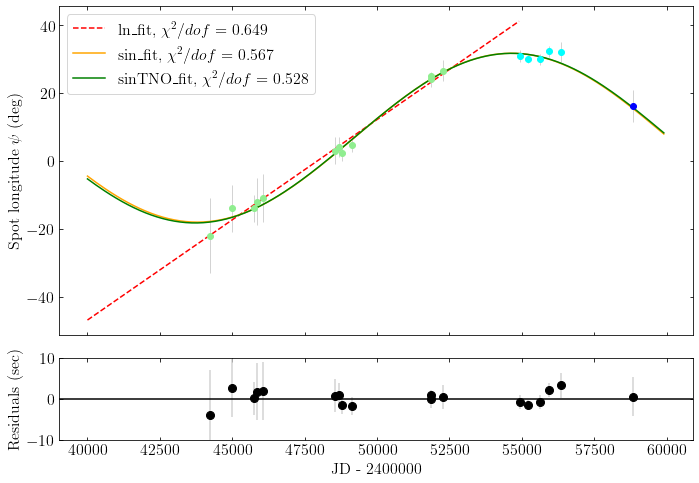

In [32]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 7), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(MeanJD_1, Psi_1, yerr=Psi_err_1, fmt='o', color='cyan',ecolor='lightgray', elinewidth=1, capsize=0)
ax0.errorbar(MeanJD_2, Psi_2, yerr=Psi_err_2, fmt='o', color='lightgreen', ecolor='lightgray', elinewidth=1, capsize=0)
ax0.errorbar(MeanJD_3, Psi_3, yerr=Psi_err_3, fmt='o', color='blue',ecolor='lightgray', elinewidth=1, capsize=0)
ax0.plot(x_range_ln, y_range_ln, '--', color='red',label='ln\_fit, $\chi^{2}/dof$ = '+str('%0.3f' %(Reduced_chisq_ln)))
ax0.plot(x_range_sin, y_range_sin, '-', color='orange',label='sin\_fit, $\chi^{2}/dof$ = '+str('%0.3f' %(Reduced_chisq_sin)))
ax0.plot(x_range_sin_TNO, y_range_sin_TNO, '-', color='green',label='sinTNO\_fit, $\chi^{2}/dof$ = '+str('%0.3f' %(Reduced_chisq_sin_TNO)))
ax0.legend(loc="best")
ax0.legend(loc="best")
ax0.set_ylabel('Spot longitude $\psi$ (deg)')
ax1.set_xlabel('JD - '+str(N))
ax1.set_ylabel('Residuals (sec)')
ax1.set_ylim(-10,10)


ax1.errorbar(x_sin_TNO, Residual_sin_TNO, yerr= dy_sin_TNO, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
plt.savefig("spot_longitude_Beuermann_2014_20200102_run008g.pdf", dpi=1200)
plt.show()